# **[Alpha Vantage API](https://www.alphavantage.co/documentation/)**
---

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0,10.0)


stock = "MSFT"

---
# Time Series Data
---

#### Import Libraries and API

In [2]:
from alpha_vantage.timeseries import TimeSeries

In [3]:
ts = TimeSeries(key = 'ALPHA_VANTAGE_API_KEY',output_format = 'pandas')
data, meta_data = ts.get_intraday(symbol = stock, interval = '1min', outputsize = 'full')

data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,6447.000000,6447.000000,6447.000000,6447.000000,6.447000e+03
mean,289.552950,289.719449,289.387788,289.555074,5.176781e+04
std,8.299048,8.277686,8.316748,8.297617,7.743268e+04
min,270.010000,270.010000,270.000000,270.000000,1.000000e+02
25%,282.340000,282.540000,282.076100,282.330000,1.513500e+03
50%,292.500000,292.720000,292.400000,292.580000,4.135600e+04
75%,296.260000,296.400000,296.100000,296.260000,7.317550e+04
max,303.600000,303.750000,303.270000,303.750000,2.134470e+06


#### Plot Data

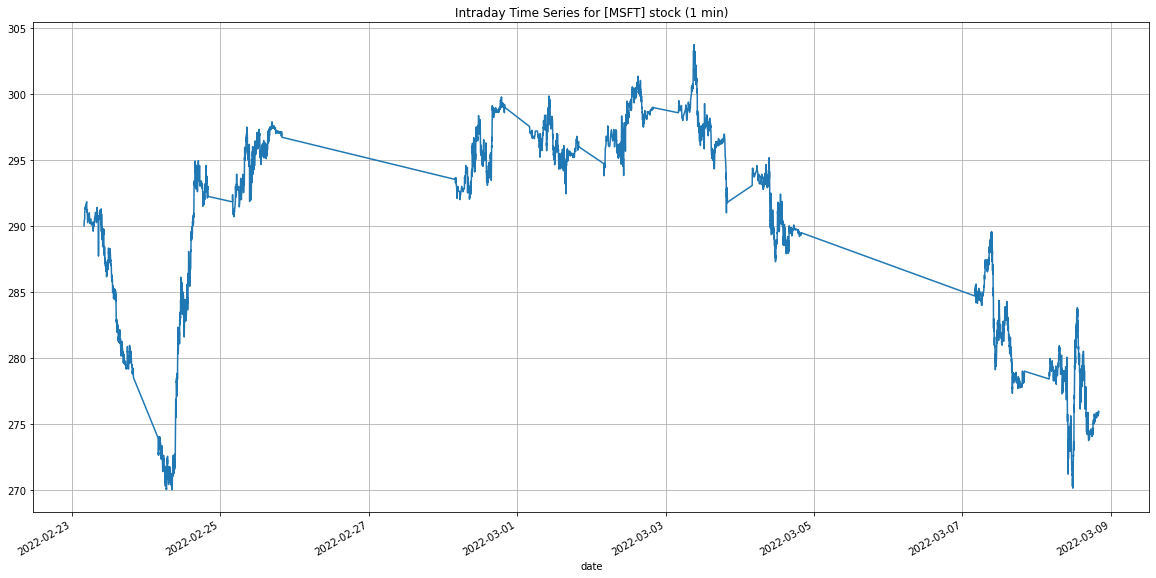

In [4]:
data['4. close'].plot()
plt.title(f"Intraday Time Series for [{stock}] stock (1 min)")
plt.grid()
plt.show()

In [5]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2022-03-08 20:00:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

## Get CSV Data

In [6]:
ts = TimeSeries(key = 'ALPHA_VANTAGE_API_KEY',output_format = 'csv')
data_csv, _ = ts.get_intraday(symbol = stock, interval = '1min', outputsize = 'compact')
data_csv

## Plot Time Series

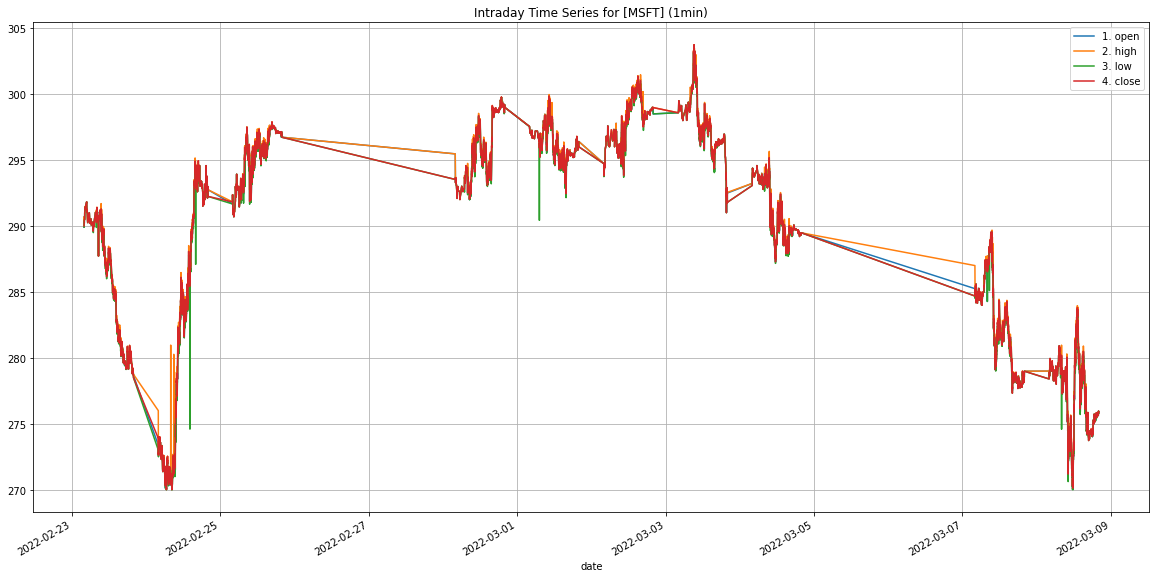

In [7]:
data = data.drop('5. volume',1)
data.plot()
plt.title(f'Intraday Time Series for [{stock}] (1min)')
plt.grid()
plt.show()

## Other Various TimeSeries Uses

In [8]:
ts.output_format = 'pandas'
data, meta_data = ts.get_quote_endpoint('MSFT')
data.describe()

,01. symbol,02. open,03. high,04. low,05. price,06. volume,07. latest trading day,08. previous close,09. change,10. change percent
count,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1
top,MSFT,277.8000,283.9600,270.0000,275.8500,48159475,2022-03-08,278.9100,-3.0600,-1.0971%
freq,1,1,1,1,1,1,1,1,1,1


In [9]:
ts.output_format = 'pandas'
data, meta_data = ts.get_monthly('MSFT')
data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,268.000000,268.000000,268.000000,268.000000,2.680000e+02
mean,66.612890,70.851260,62.817121,67.208021,9.928400e+08
std,66.413413,70.300305,62.825642,67.413016,4.178641e+08
min,16.035000,18.880000,14.870000,16.150000,2.140916e+08
25%,27.302500,28.317500,26.062500,27.297500,6.478197e+08
50%,40.415050,41.580000,38.002500,40.400000,9.433271e+08
75%,69.685000,73.362500,65.252500,69.322500,1.296100e+09
max,335.350000,349.670000,326.370000,336.320000,3.044579e+09


In [10]:
ts.output_format = 'pandas'
data, meta_data = ts.get_symbol_search('MSFT')
data.describe()

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
count,2,2,2,2,2,2,2,2,2
unique,2,1,1,2,2,2,2,2,2
top,MSFT34.SAO,Microsoft Corporation,Equity,Brazil/Sao Paolo,09:30,16:00,UTC-04,USD,1.0000
freq,1,2,2,1,1,1,1,1,1


---
# Sector Performance
---

In [11]:
from alpha_vantage.sectorperformance import SectorPerformances 

In [12]:
sp = SectorPerformances(key='ALPHA_VANTAGE_API_KEY', output_format='pandas')
data, meta_data = sp.get_sector()
data.describe()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000
mean,0.021282,-0.007282,-0.012427,-0.041936,-0.050164,-0.070255,0.125945,0.427036,0.584336,1.754280
std,0.021876,0.010972,0.045476,0.064457,0.154291,0.161687,0.145846,0.226828,0.455959,1.237407
min,-0.031900,-0.026400,-0.065500,-0.114900,-0.210700,-0.201300,-0.083100,0.224600,0.126700,0.069100
25%,0.016400,-0.012450,-0.044500,-0.090550,-0.130200,-0.150750,0.049150,0.316250,0.359250,1.070725
50%,0.023000,-0.005500,-0.020600,-0.037300,-0.077300,-0.097200,0.112200,0.377100,0.450400,1.420250
75%,0.035000,-0.002700,-0.001500,-0.030800,-0.021750,-0.073350,0.163050,0.451050,0.624650,2.441050
max,0.042200,0.013900,0.085600,0.102300,0.360600,0.388000,0.479700,1.058300,1.818900,4.371300


In [13]:
meta_data

{'Information': 'US Sector Performance (realtime & historical)',
 'Last Refreshed': '2022-03-09 15:44:12 US/Eastern'}

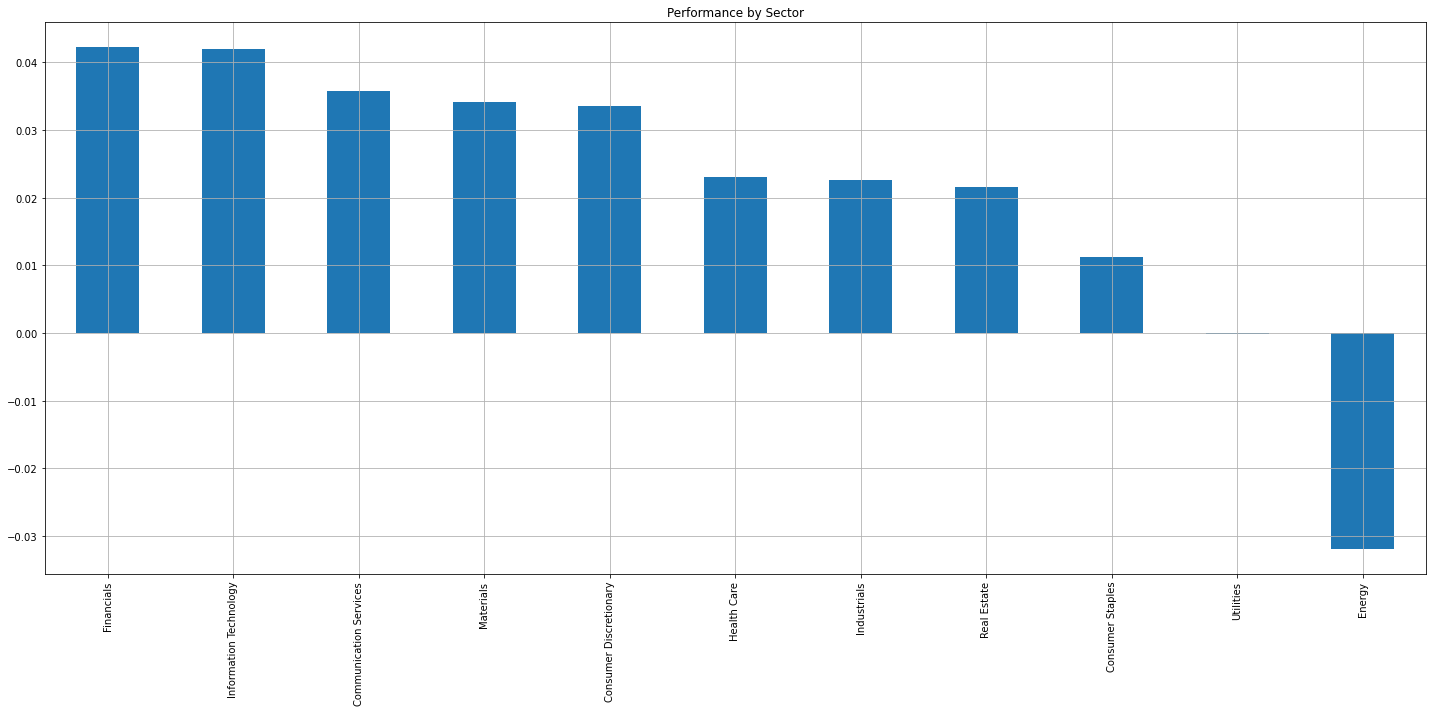

In [14]:
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Performance by Sector')
plt.tight_layout()
plt.grid()
plt.show()

---
# Crypto Currency Analysis
---

In [15]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

crypto = 'BTC'
mkt = 'CNY'

In [16]:
cc = CryptoCurrencies(key='ALPHA_VANTAGE_API_KEY', output_format = 'pandas')
data, meta_data = cc.get_digital_currency_daily(symbol = crypto, market = mkt)
data.describe()

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,164133.508278,25979.124120,168873.564749,26729.382350,158765.923862,25129.540490,164328.384093,26009.969150,63862.121888,63862.121888
std,120299.518059,19041.060805,123724.311681,19583.138651,116250.983706,18400.257001,120275.806915,19037.307795,37269.700263,37269.700263
min,30325.983179,4800.010000,33898.187018,5365.420000,23895.119127,3782.130000,30325.920000,4800.000000,1350.801890,1350.801890
25%,59206.572991,9371.242500,60418.267237,9563.030000,58107.116238,9197.220000,59258.774639,9379.505000,39902.490758,39902.490758
50%,82608.216744,13075.265000,85673.725002,13560.475000,81368.234100,12879.000000,82781.958993,13102.765000,54426.432546,54426.432546
75%,274867.094421,43506.085000,281699.224097,44587.477500,267500.975838,42340.172500,274867.126011,43506.090000,78487.249957,78487.249957
max,426621.378178,67525.820000,435935.100000,69000.000000,418386.500960,66222.400000,426621.441357,67525.830000,402201.673764,402201.673764


In [17]:
data.head(5)

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2022-03-09,244696.247277,38730.63,246587.637000,39030.00,244227.585455,38656.45,246007.211527,38938.13,1350.80189,1350.80189
2022-03-08,240004.448379,37988.01,248685.685232,39362.08,239244.025935,37867.65,244696.247277,38730.63,55528.43367,55528.43367
2022-03-07,242738.772320,38420.80,249857.592503,39547.57,234741.574500,37155.00,240004.385200,37988.00,63941.20316,63941.20316
2022-03-06,248912.434663,39397.97,250781.901273,39693.87,240639.776403,38088.57,242738.835499,38420.81,39677.26158,39677.26158
2022-03-05,247337.255835,39148.65,250272.488996,39613.24,242655.312861,38407.59,248912.371484,39397.96,30363.13341,30363.13341


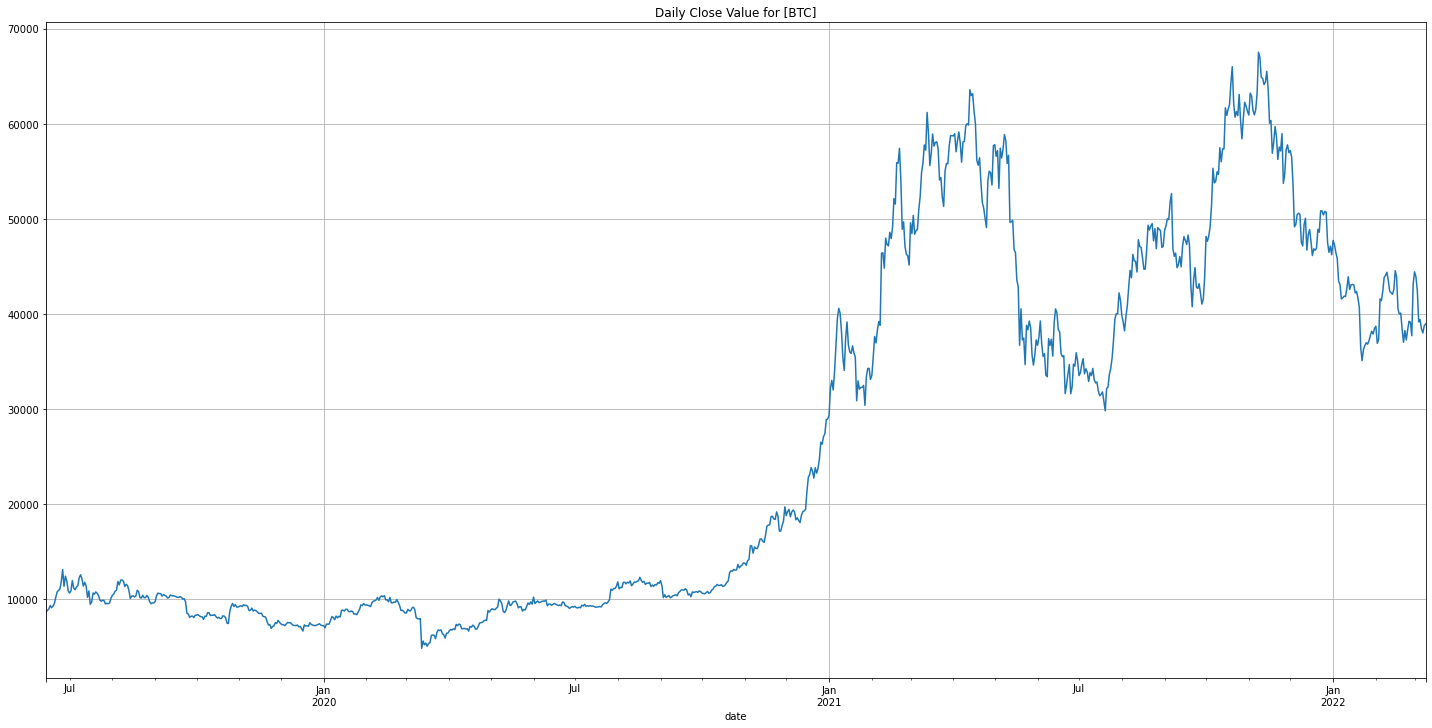

In [18]:
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title(f'Daily Close Value for [{crypto}]')
plt.grid()
plt.show()

---
# Foreign Exchange (FX)
---

In [19]:
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint

curr1 = 'BTC'
curr2 = 'USD'

In [20]:
cc = ForeignExchange(key='ALPHA_VANTAGE_API_KEY')
# no metadata in this call
data, _ = cc.get_currency_exchange_rate(from_currency=curr1, to_currency=curr2)
pprint(data)

{'1. From_Currency Code': 'BTC',
 '2. From_Currency Name': 'Bitcoin',
 '3. To_Currency Code': 'USD',
 '4. To_Currency Name': 'United States Dollar',
 '5. Exchange Rate': '41804.10000000',
 '6. Last Refreshed': '2022-03-09 20:44:07',
 '7. Time Zone': 'UTC',
 '8. Bid Price': '41804.09000000',
 '9. Ask Price': '41804.10000000'}
